# Aplicaciones de Numpy

In [7]:
# Importación de libreria numpy
import numpy as np
import matplotlib.pyplot as plt

# Version
print(f"Numpy version: {np.__version__}")

Numpy version: 2.0.2


## Algebra Lineal

In [2]:
# Dos Vectores
A = np.array([3, 4])
B = np.array([-2, 1])

print(A, B)

[3 4] [-2  1]


1. Suma vectorial, es elemento a elemento

In [3]:
# Suma entre vectores
resultant = A + B
print(f"Vector resultado: {resultant}")

Vector resultado: [1 5]


2. Magnitud:
$ |v| = \sqrt{a^2 + b^2}$

In [4]:
# Magnitud del vector
magnitude = np.linalg.norm(resultant)
print(f"Magnitud del vector resultado: {magnitude}")

Magnitud del vector resultado: 5.0990195135927845


3. Normalización de un vector: resultado de la suma dividido por la magnitud

In [5]:
# Normalización del vector
unit_vector = resultant / magnitude
print(f"Vector unitario: {unit_vector}")

Vector unitario: [0.19611614 0.98058068]


4. Producto punto entre vectores

In [6]:
# Producto punto
dot_product = np.dot(A, B)
print(f"Producto punto: {dot_product}")

Producto punto: -2


### Ejercicio

Un sistema de ecuaciones puede ser representado de la siguiente forma:
$$ Ax = b $$
Donde:
- $A$ es la matriz de coeficientes
- $x$ es el vector incógnita
- $b$ es el vector de constantes.

El objetivo es hallar el vector $x$

Consideren el siguiente sistema de ecuaciones:

\begin{align*}
2x + y + z &= 4 \\
x + 3y + 2z &= 5 \\
3x + y + 4z &= 6
\end{align*}

1. Represente este sistema de ecuaciones en la forma matricial: $Ax = b$
2. Utilizando Numpy resuelva el sistema de ecuaciones
3. Verifique la solución

In [7]:
A = np.array([[2, 1, 1], [1, 3, 2], [3, 1, 4]])
A

array([[2, 1, 1],
       [1, 3, 2],
       [3, 1, 4]])

In [8]:
b = np.array([4, 5, 6])
b

array([4, 5, 6])

In [9]:
x = np.linalg.solve(A, b)
x

array([1.35714286, 1.07142857, 0.21428571])

## Movimiento parabólico

Un proyectil es lanzado con una velocidad inicial de $v_0=50 \, m/s$ a un ángulo
$\theta = 30$ con respecto a la horizontal. Simule la trayectoria asumiendo que
$g=9.8 \, m/s$

Recuerdando:
- $x(t) = v_0 \cdot \cos(\theta) \cdot t$
- $y(t) = v_0 \cdot \sin(\theta) \cdot t - \frac{1}{2}gt^2$

In [10]:
# Constantes
v0 = 50
theta = np.radians(30)
g = 9.81

# Tiempo de vuelo
t_flight = 2 * v0 * np.sin(theta) / g
print(f"Tiempo de vuelo: {t_flight} seconds")

Tiempo de vuelo: 5.09683995922528 seconds


In [11]:
# Grafica del vuelo del proyectil
t = np.linspace(0, t_flight, num=1000)

In [12]:
# Posición horizontal y vertical en función del tiempo
x = v0 * np.cos(theta) * t
y = v0 * np.sin(theta) * t - 0.5 * g * t**2

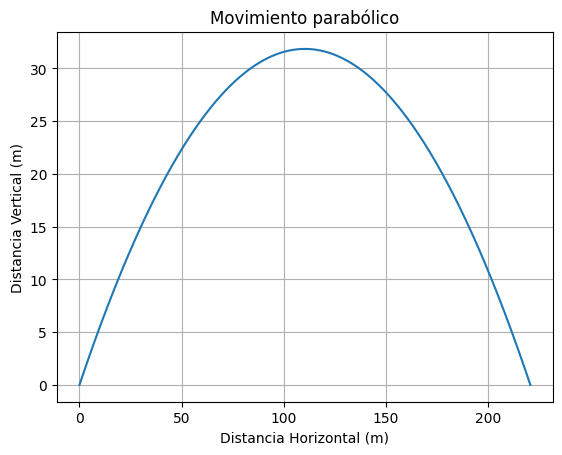

In [13]:
import matplotlib.pyplot as plt

# 4. Plot the trajectory
plt.plot(x, y)
plt.title("Movimiento parabólico")
plt.xlabel("Distancia Horizontal (m)")
plt.ylabel("Distancia Vertical (m)")
plt.grid(True)
plt.show()

### Ejercicio

Un cañon ubicado en lo alto de un castillo a $30 \, m$ de altura dispara una bala
con el fin de impactar un barco pirata que se encuentra a $200 \, m$ de la costa.
Suponiendo que el castillo se encuentra sobre un risco de $100 \, m$ de altura,
y el proyectil sale con una $v_0 = 80 \, m/s$, determinar el ángulo de inclinación
que debe tener el cañon al momento de disparar.

In [2]:
# Datos conocidos
v0 = 80
g = 9.8
h_canion = 30
h_castillo = 100
h_total = h_canion + h_castillo
barco = 200

Qué tenemos:
- $v0 = 80$
- $g = 9.8$
- $h_{canion} = 30$
- $h_{castillo} = 100$
- $h_{total} = 130$
- $barco = 200$

Las formulas de la trayectoria son:
- $x(t) = v_0 \cos(\theta)t$
- $y(t) = h_{total} + v_0 \sin(\theta)t - \frac{1}{2}gt^2$

De lo anterior podemos determinar que cuando la bala toca el mar ($y(t_{total})=0$) el
tiempo de vuelo ha terminado, por lo tanto nos queda:
- $0 = h_{total} + v_0 \sin(\theta)t_{total} - \frac{1}{2}gt^2_{total}$

Si despejamos $t_{total}$ nos queda:
- $t_{total} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

Donde:
- $a = - \frac{1}{2}g$
- $b = v_0 \sin(\theta)$
- $c = h_{total}$

Por último deberemos evaluar para cada ángulo y cada tiempo de vuelo si la
trayectoria de la bala en el eje $x$ se acerca al barco:
- $x_{barco} = v_0 \cos(\theta)t_{total}$


In [3]:
def tiempo_vuelo(theta_rad):
    a = -0.5 * g
    b = v0 * np.sin(theta_rad)
    c = h_total

    discriminante = b**2 - 4 * a * c
    if discriminante < 0:
        return None  # No tiene solución real

    t1 = (-b + np.sqrt(discriminante)) / (2 * a)
    t2 = (-b - np.sqrt(discriminante)) / (2 * a)

    # Tomamos el valor positivo
    return max(t1, t2)

In [4]:
def calcular_trayectoria(theta_rad, t):
    # Posicion en X e Y en el tiempo t
    x = v0 * np.cos(theta_rad) * t
    y = h_total + v0 * np.sin(theta_rad) * t - 0.5 * g * t**2

    return x, y

In [5]:
def angulo_optimo():
    for theta_deg in np.arange(0, 90, 0.001):
        theta_rad = np.radians(theta_deg)

        # Calcular el tiempo de vuelo
        t_total = tiempo_vuelo(theta_rad)
        if t_total is None:
            continue  # Continuar siguiente angulo

        # Calcular la distancia recorrida en el tiempo t_total
        x_final, _ = calcular_trayectoria(theta_rad, t_total)

        # Validar si la distancia recorrida es cercana al objetivo
        if np.abs(x_final - barco) < 2:
            return theta_deg, t_total

    return None, None  # No tiene solucion

Angulo optimo de lanzamiento: 81.78 grados
Tiempo de vuelo: 17.66 segundos


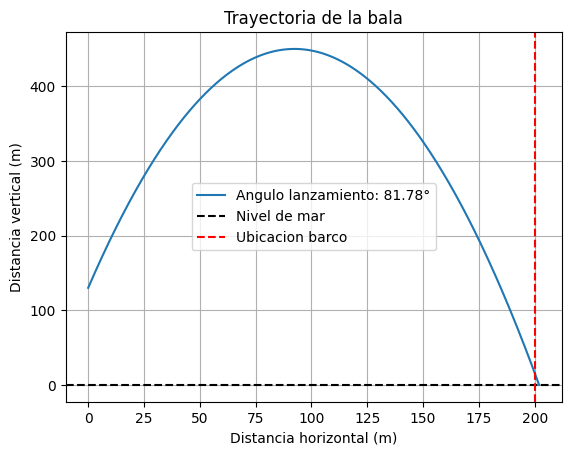

In [8]:
angulo, t_total = angulo_optimo()

if angulo is not None:
    print(f"Angulo optimo de lanzamiento: {angulo:.2f} grados")
    print(f"Tiempo de vuelo: {t_total:.2f} segundos")

    # Simular la trayectoria
    theta_rad = np.radians(angulo)
    t_values = np.linspace(0, t_total, 500)

    # Calcular las posiciones X e Y en el tiempo
    x_values, y_values = [], []
    for t in t_values:
        x, y = calcular_trayectoria(theta_rad, t)
        x_values.append(x)
        y_values.append(y)

    # Grafica
    plt.plot(x_values, y_values, label=f"Angulo lanzamiento: {angulo:.2f}°")
    plt.axhline(0, color="black", linestyle="--", label="Nivel de mar")
    plt.axvline(barco, color="red", linestyle="--", label="Ubicacion barco")
    plt.title("Trayectoria de la bala")
    plt.xlabel("Distancia horizontal (m)")
    plt.ylabel("Distancia vertical (m)")
    plt.grid(True)
    plt.legend()
    plt.show()

else:
    print("No solution found!")

### Scipy: fsolve

In [19]:
from scipy.optimize import fsolve

Las formulas de la trayectoria son:
- $x(t) = v_0 \cos(\theta)t$
- $y(t) = h_{total} + v_0 \sin(\theta)t - \frac{1}{2}gt^2$

De la primera ecuación despejamos $t$ quedando:
- $t = \frac{x(t)}{v_0 \cos(\theta)}$

Remplazamos $t$ en la segunda ecuación:
- $y(t) = h_{total} + v_0 \sin(\theta) \cdot \frac{x(t)}{v_0 \cos(\theta)} - \frac{1}{2}g \cdot (\frac{x(t)}{v_0 \cos(\theta)})^2$

Esto será la función que deberemos resolver.

In [9]:
# Función para calcular la posición vertical final (y_final) dado un ángulo theta
def calcular_impacto(theta):
    # Convertimos el ángulo a radianes
    theta_rad = np.radians(theta)

    # Tiempo de vuelo hasta la posición horizontal del barco
    t_vuelo = barco / (v0 * np.cos(theta_rad))

    # Posición vertical final (altura sobre el nivel del mar)
    y_final = h_total + v0 * np.sin(theta_rad) * t_vuelo - 0.5 * g * t_vuelo**2

    return y_final  # Queremos que y_final sea 0 (impactar el nivel del mar)

Ángulo óptimo: 81.86 grados


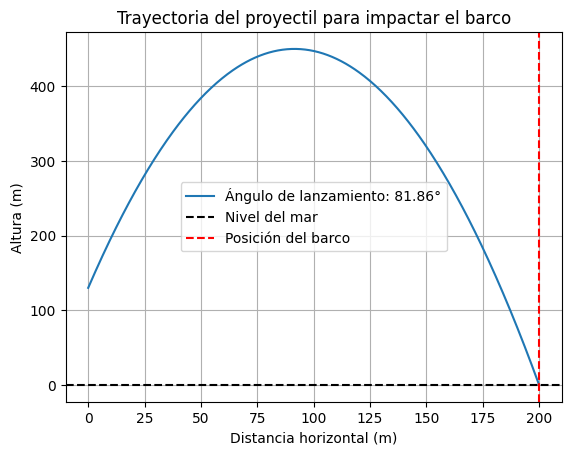

In [12]:
from scipy.optimize import fsolve

# Usamos fsolve para encontrar el ángulo theta que hace que y_final = 0
angulo_inicial = 80  # Suposición inicial de 45 grados
angulo_solucion = fsolve(calcular_impacto, angulo_inicial)[0]

print(f"Ángulo óptimo: {angulo_solucion:.2f} grados")

# Simular la trayectoria del proyectil
theta_rad = np.radians(angulo_solucion)
t_total = barco / (v0 * np.cos(theta_rad))
t_values = np.linspace(0, t_total, 500)
x_values = v0 * np.cos(theta_rad) * t_values
y_values = h_total + v0 * np.sin(theta_rad) * t_values - 0.5 * g * t_values**2

# Graficar la trayectoria
plt.plot(x_values, y_values, label=f"Ángulo de lanzamiento: {angulo_solucion:.2f}°")
plt.axhline(0, color="black", linestyle="--", label="Nivel del mar")
plt.axvline(barco, color="red", linestyle="--", label="Posición del barco")
plt.title("Trayectoria del proyectil para impactar el barco")
plt.xlabel("Distancia horizontal (m)")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.legend()
plt.show()